Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Modeling Volatility of the US Government Bond Yields

**Name:** József Soltész

**Email address associated with your DataCamp account:** [solteszjozsef@gmail.com](mailto:solteszjozsef@gmail.com)

**GitHub username:** solteszjozsef

**Project description**: 
- In this project we will explore the volatility structure of US Government Bond Yields. Essentially all financial assets exhibits the phenomena called volatility clustering which means that low and high volatility regimes following each other. The alternating regimes of volatility are in the focus of risk management and investment decisions. We will use the well-known method called GARCH ([Generalized AutoRegressive Conditional Heteroskedasticity](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)) to explore the statistical properties of these financial time series.
- This project assumes background knowledge on time series analysis, GARCH modeling and uses packages *rugarch*, *xts*, *zoo* and *moments*. If you feel lost seeing these packages you are welcome to complete [GARCH Models in R](https://www.datacamp.com/courses/garch-models-in-r/) beforehand.
- The historical yield curve data are published by the US Federal Reserve Data Releases and imported from Quandl, using this site: [https://www.quandl.com/data/FED/SVENY](https://www.quandl.com/data/FED/SVENY)

![](img/VolaClusteringAssetClasses_small.png)

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Volatility clustering is present on every market, there is no escape

The time series of financial assets and commodities has many statistical properties that differentiates them from pure theoretical processes that build on the assumption of normality and independence of returns. The two most famous of them are the heavy tails of return distributions and volatility clustering that we will examine in more details.

![](img/VolaClusteringAssetClasses.png)

In the picture above you can see the returns of 4 assets as examples for 4 major asset classes. The EUR/USD for foreign exchange rates, the Treasury 5 year bond yield for interest rates, S&P 500 for equities and Brent Crude Oil for commodities. All of them exhibit the alternating regimes of low and high volatilities, where the highest volatility can be observed around the end of 2008 in the most severe period of the financial crisis.

We will examine the volatility of US government bond yield in this notebook with comparison across tenors and decades of years.

(The picture is own work using financial data from Yahoo and FRED.)

In [1]:
#load the packages
library(xts)
library(readr)

#load the data
yc_raw <- read_csv("datasets/FED-SVENY.csv")

#Convert in into xts format
yc_all <- as.xts(yc_raw[, -1], order.by = yc_raw$Date)

#Take a look at it using the tail function. Filter for the 1st, 5th, 10th, 20th and 30th columns.
tail(yc_all[, c(1, 5, 10, 20, 30)])

#Differentiate it using diff.xts and filter for changes in and after 2000
ycc_all <- diff.xts(yc_all)
ycc <- ycc_all["2000/", ]

#Take a look at it using the tail function. Filter for the 1st, 5th, 10th, 20th and 30th columns.
tail(ycc[, c(1, 5, 10, 20, 30)])

Warning message:
"package 'xts' was built under R version 3.4.4"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.4"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'readr' was built under R version 3.4.4"Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = "")
)
See spec(...) for full column specifications.


           SVENY01 SVENY05 SVENY10 SVENY20 SVENY30
2018-11-15  2.7156  2.9357  3.1111  3.3153  3.3966
2018-11-16  2.6854  2.8986  3.0775  3.2878  3.3664
2018-11-19  2.6736  2.8772  3.0521  3.2737  3.3609
2018-11-20  2.6814  2.8816  3.0576  3.2697  3.3500
2018-11-21  2.7041  2.8922  3.0761  3.2709  3.3452
2018-11-23  2.6955  2.8750  3.0630  3.2613  3.3366

           SVENY01 SVENY05 SVENY10 SVENY20 SVENY30
2018-11-15 -0.0052 -0.0169 -0.0100  0.0039  0.0101
2018-11-16 -0.0302 -0.0371 -0.0336 -0.0275 -0.0302
2018-11-19 -0.0118 -0.0214 -0.0254 -0.0141 -0.0055
2018-11-20  0.0078  0.0044  0.0055 -0.0040 -0.0109
2018-11-21  0.0227  0.0106  0.0185  0.0012 -0.0048
2018-11-23 -0.0086 -0.0172 -0.0131 -0.0096 -0.0086

## 2. The US yields are no exceptions, but maturity matters

We have imported the time series of US Government Yields, let's check visually whether this data show the expected properties or not. 

These data include the whole yield curve. The yield of a bond basically means the price of the money lent, the higher the yield the more money you receive on your investment. The yield curve has many maturities, in this case it ranges from 1 year to 30 years. The different maturities has different yields, but the yields of neighboring maturities are relatively close to each other and also move together. The relationship between the volatility and level of different maturities gets weaker if they are farther from each other.

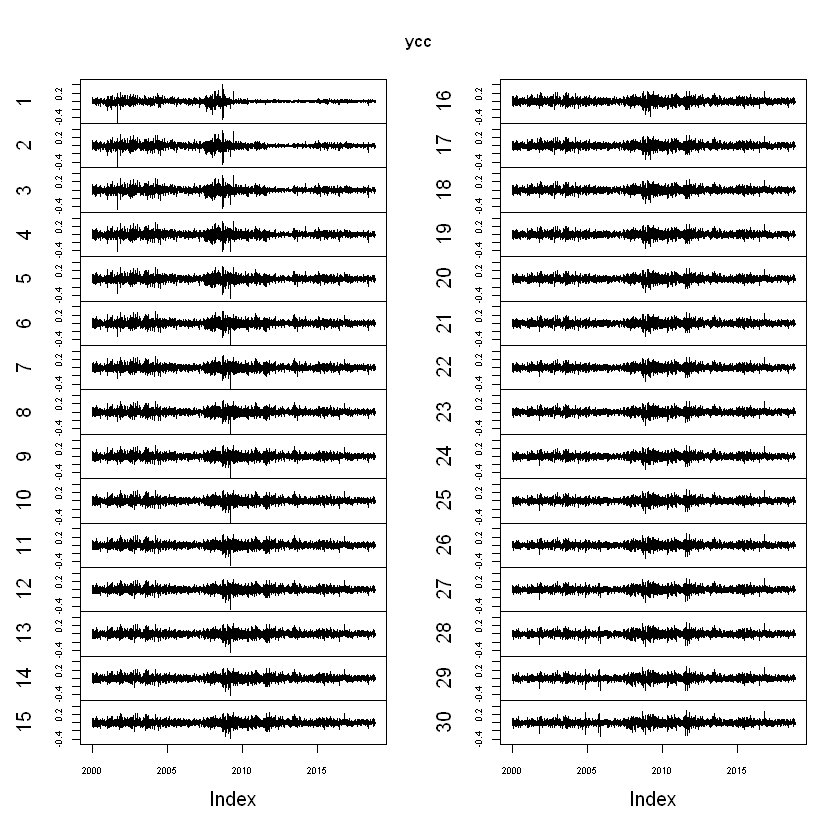

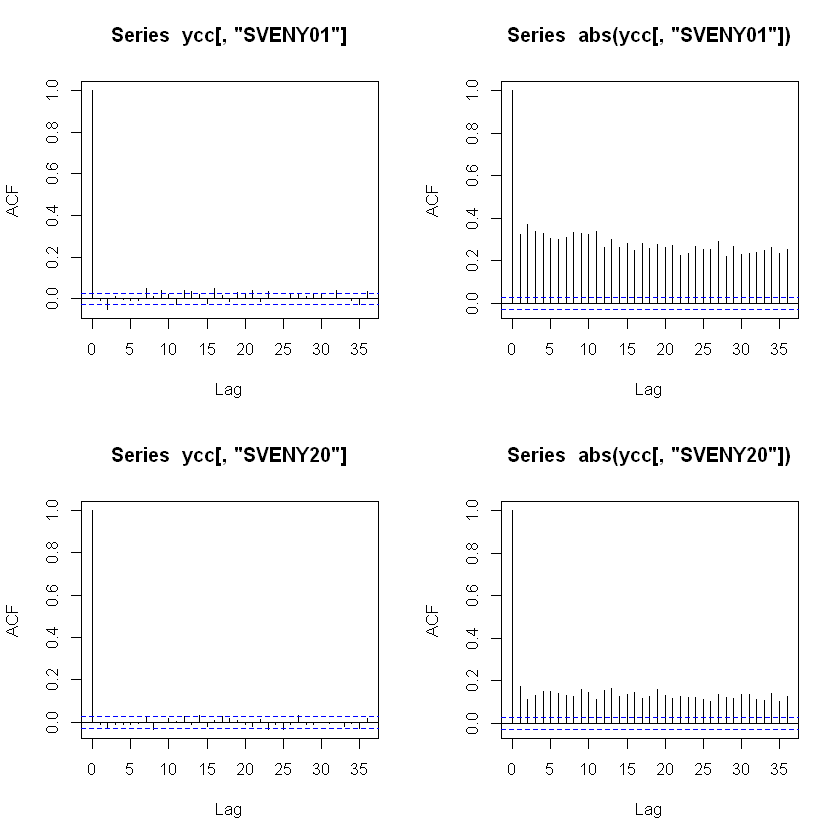

In [2]:
#Plot the time series using plot.zoo.
plot.zoo(ycc, plot.type = "multiple", ylim = c(-0.5, 0.5), cex.axis = 0.7, ylab = 1:30)

#Plot the autocorrelations of the changes and absolute values of changes, for the 1Y and 20Y yields. Use the acf function.
par(mfrow=c(2,2))
acf(ycc[, "SVENY01"])
acf(abs(ycc[, "SVENY01"]))
acf(ycc[, "SVENY20"])
acf(abs(ycc[, "SVENY20"]))


## 3. GARCH in action

The GARCH method is the most known econometric tool that handles the changing volatility of financial time series. The abbreviation GARCH stands for [Generalized AutoRegressive Conditional Heteroskedasticity](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity). It assumes a hidden volatility variable that has a long-run average it tries to return to, but the short-run behaviour is affected by the past returns.

The most popular form of the GARCH model family assumes that the volatility follows this process:
$$\sigma^2_t = \omega + \alpha*\epsilon^2_{t-1} + \beta*\sigma^2_{t-1}$$
, where $\sigma_t$ is the current volatility, $\sigma_{t-1}$ the last day's volatility and $\epsilon_{t-1}$ is the last day's return. The estimated parameters are $\omega$, $\alpha$ and $\beta$.

There are many packages to estimate GARCH models in R, one of them is the [*rugarch*](https://cran.r-project.org/web/packages/rugarch/index.html) package, developed by Alexios Ghalanos. This is for univariate time series, its brother package [*rmgarch*](https://cran.r-project.org/web/packages/rmgarch/index.html) is for the multivariate cases. This package is very flexible and we will use this in this project.

Warning message:
"package 'rugarch' was built under R version 3.4.4"Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma



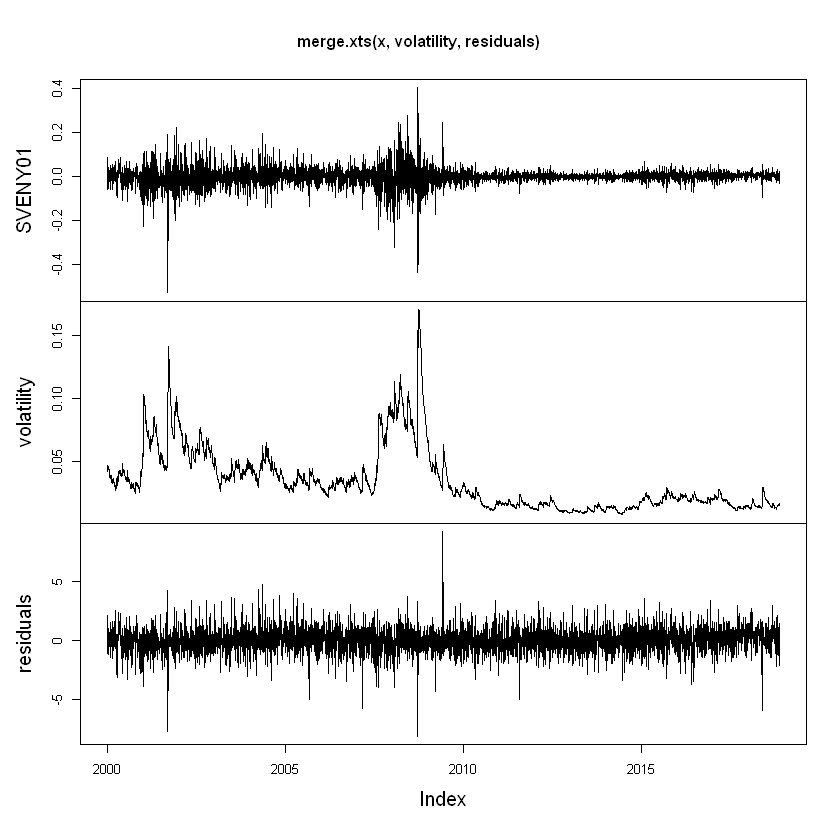

In [3]:
#Import the package rugarch
library(rugarch)

#Specify the GARCH model. Use the skewed t-distribution (sstd).
spec_first <- ugarchspec(distribution.model = "sstd")

#Fit the model
x <- ycc[, "SVENY01"]
fit_first <- ugarchfit(x, spec = spec_first)

#Plot the yield changes with the estimated volatilities and residuals.
volatility <- sigma(fit_first)
residuals <- residuals(fit_first, standardize = TRUE)
plot.zoo(merge.xts(x, volatility, residuals))

*Stop here! Only the three first tasks. :)*

Further tasks to be considered:
* Kurtosis before and after the GARCH model.
* Comparison between maturities, where is a volatility shock the most persistent?
* Did the behavior change after the crisis of 2009?
* Other topics, like statistical tests and forecasts.